In [12]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib as plt

import pandas_profiling as pp

import warnings
warnings.filterwarnings('ignore')

In [6]:
#lets read training data
train_df = pd.read_csv("../input/tabular-playground-series-aug-2021/train.csv")

#have a lquick look
train_df.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


In [8]:
#lets's generate a quick report using profiling
profile = pp.ProfileReport(train_df,minimal=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/110 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
#saving to see offline
profile.to_file(output_file="tabluar_playground_profile.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

As the profiling report suggests there are no missing values.

100 features and 1 targte variable.

24% of target variable loss are 0.

All features are numeric.

Let's check the co-relation between features as we skipped it in profiling.

In [10]:
corr = train_df.loc[:,'f0':'loss' ].corr()

<AxesSubplot:>

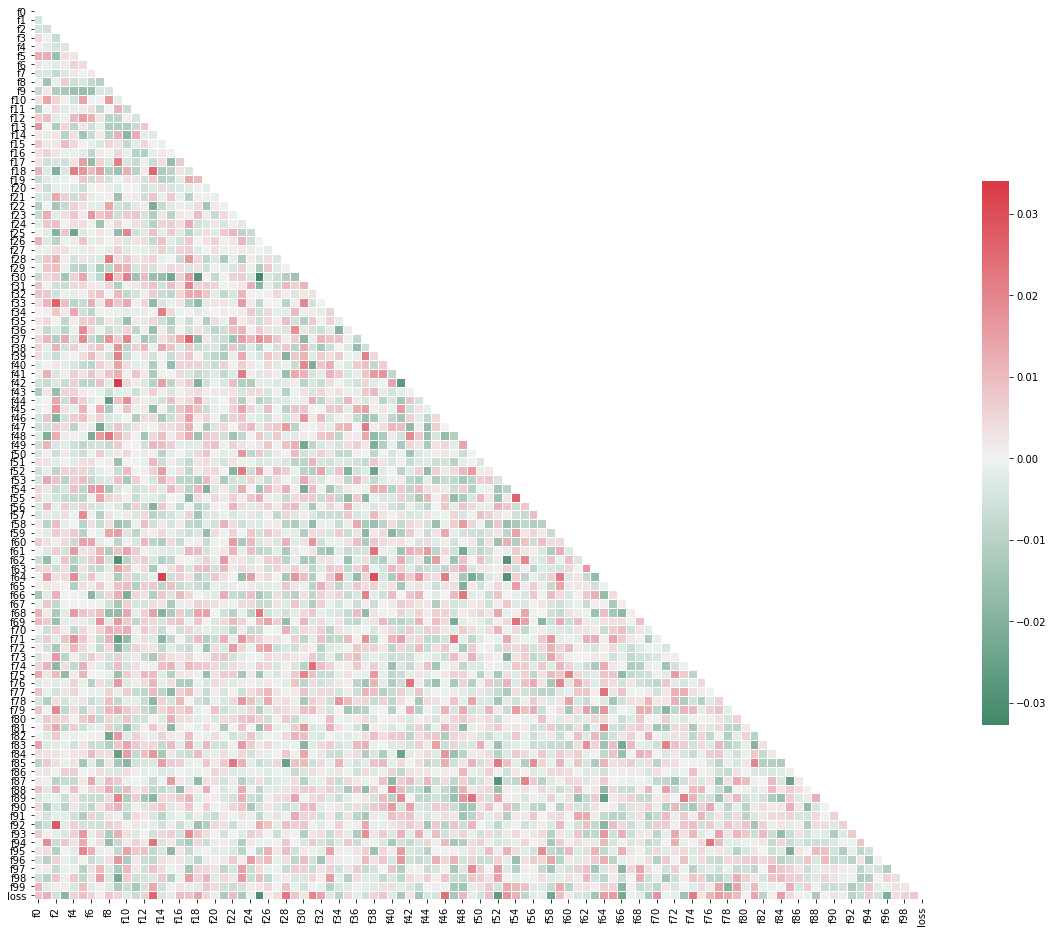

In [27]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.pyplot.subplots(figsize=(20,20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Looks like many co-relations.. Loss ig highly co-related with f13, f25, f28, f52, f58,f66,f96. Taking a closer look to these features again in profile report.